In [28]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

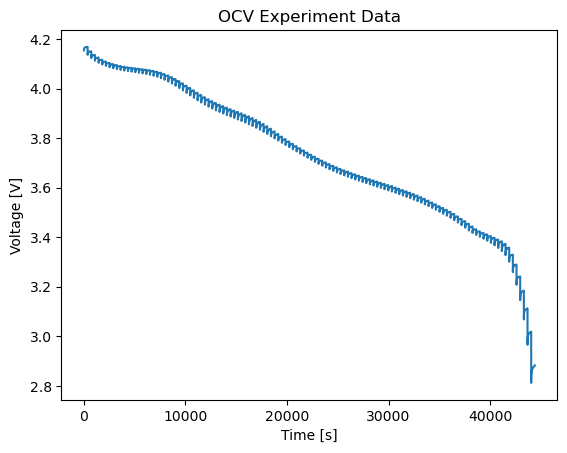

In [17]:
df_ex = pd.read_csv('data_step8_voltage.csv')
new_time = np.arange(0, 44403)
df_ex['Testtime [s]'] = new_time
plt.plot(df_ex['Testtime [s]'], df_ex['Voltage[V]'])
plt.xlabel("Time [s]")
plt.ylabel("Voltage [V]")
plt.title("OCV Experiment Data")
plt.show()

In [3]:
model = pybamm.lithium_ion.DFN()

param = pybamm.ParameterValues("OKane2022")

param

{'Ambient temperature [K]': 298.15,
 'Boltzmann constant [J.K-1]': 1.380649e-23,
 'Bulk solvent concentration [mol.m-3]': 2636.0,
 'Cation transference number': 0.2594,
 'Cell cooling surface area [m2]': 0.00531,
 'Cell thermal expansion coefficient [m.K-1]': 1.1e-06,
 'Cell volume [m3]': 2.42e-05,
 'Contact resistance [Ohm]': 0,
 'Current function [A]': 5.0,
 'Dead lithium decay constant [s-1]': 1e-06,
 'Dead lithium decay rate [s-1]': <function SEI_limited_dead_lithium_OKane2022 at 0x138f134c0>,
 'EC diffusivity [m2.s-1]': 2e-18,
 'EC initial concentration in electrolyte [mol.m-3]': 4541.0,
 'Electrode height [m]': 0.065,
 'Electrode width [m]': 1.58,
 'Electrolyte conductivity [S.m-1]': <function electrolyte_conductivity_Nyman2008_arrhenius at 0x138f8c180>,
 'Electrolyte diffusivity [m2.s-1]': <function electrolyte_diffusivity_Nyman2008_arrhenius at 0x138f8c0e0>,
 'Electron charge [C]': 1.602176634e-19,
 'Exchange-current density for plating [A.m-2]': <function plating_exchange_curr

In [1]:
# 定义仿真时间
t_eval = np.linspace(0, 44402, 44403)

# 创建仿真器并运行仿真
sim = pybamm.Simulation(model, parameter_values=param)
sim.solve(t_eval)
# 提取仿真结果
solution = sim.solution
voltage = solution["Terminal voltage [V]"].entries
time = solution["Time [s]"].entries

# 将结果保存到DataFrame中
df = pd.DataFrame({"Time [s]": time, "OCV [V]": voltage})

# 将DataFrame保存为CSV文件
df.to_csv("ocv_data.csv", index=False)
# 绘制OCV数据
plt.plot(time, voltage)
plt.xlabel("Time [s]")
plt.ylabel("Voltage [V]")
plt.title("OCV Simulation using PyBaMM")
plt.show()


NameError: name 'pybamm' is not defined

In [5]:
print(df.shape[0])

3545


In [20]:
param1 = pybamm.ParameterValues("OKane2022")
param1['Current function [A]'] = 1
param1['Current function [A]'] = py
# param1

In [21]:
t_eval = np.linspace(0, 44402, 44403)

# 创建仿真器并运行仿真
sim = pybamm.Simulation(model, parameter_values=param1)
sim.solve(t_eval)
# 提取仿真结果
solution = sim.solution


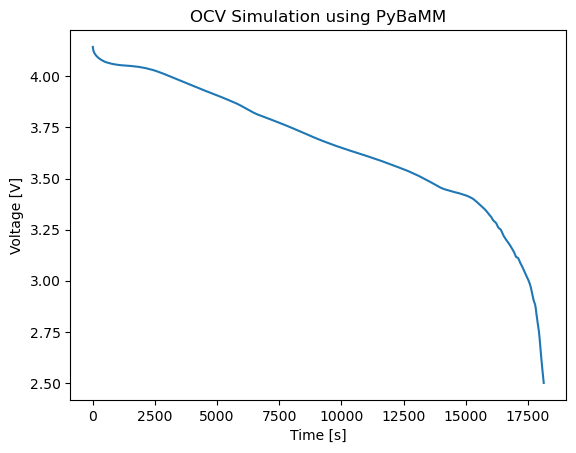

In [22]:

voltage = solution["Terminal voltage [V]"].entries
time = solution["Time [s]"].entries
current = solution["Current [A]"].entries

# 将结果保存到DataFrame中
df = pd.DataFrame({"Time [s]": time, "OCV [V]": voltage})

# 将DataFrame保存为CSV文件
df.to_csv("ocv_current0_data.csv", index=False)
# 绘制OCV数据
plt.plot(time, voltage)
plt.xlabel("Time [s]")
plt.ylabel("Voltage [V]")
plt.title("OCV Simulation using PyBaMM")
plt.show()

In [8]:
df1 = pd.read_csv('ocv_data.csv')
time1 = df1['Time [s]']
ocv1 = df1['OCV [V]']
df1.shape[0]

3545

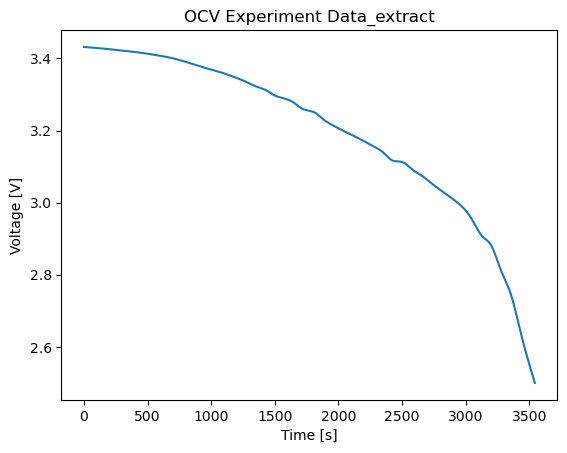

      Time [s]   OCV [V]
0            0  3.431998
1            1  3.431969
2            2  3.431941
3            3  3.431912
4            4  3.431884
...        ...       ...
3540      3540  2.504454
3541      3541  2.503276
3542      3542  2.502098
3543      3543  2.500921
3544      3544  2.500010

[3545 rows x 2 columns]


In [23]:
df2 = pd.read_csv('data_step8_voltage.csv')
# 计算每个间隔所需的步长
step = (len(df2) // 3545) + 1

# 使用切片来选择均匀的3545行数据
df2_sampled = df2.iloc[::step]

# 如果样本数量不足3545，则选择最后一行以确保样本数量为3545
if len(df2_sampled) < 3545:
    df2_sampled = df.iloc[-3545:]

# 重置索引以确保时间列从0开始
df2_sampled.reset_index(drop=True, inplace=True)
df2 = df2_sampled
new_time = np.arange(0, 3545)
df2['Time [s]'] = new_time
time2 = df2['Time [s]']
ocv2 = df2['OCV [V]']
plt.plot(time2, ocv2)
plt.xlabel("Time [s]")
plt.ylabel("Voltage [V]")
plt.title("OCV Experiment Data_extract")
plt.show()
print(df2)


In [24]:
df2.shape[0]

3545

In [25]:
df3 = pd.read_csv('ocv_current0_data.csv')
time3 = df3['Time [s]']
ocv3 = df3['OCV [V]']
df3.shape[0]

18140

In [26]:
df4 = pd.read_csv('data_step8_voltage.csv')
new_time = np.arange(0, 44403)
df4['Testtime [s]'] = new_time
time4 = df4['Testtime [s]']
ocv4 = df4['Voltage[V]']

df4.shape[0]

44403

Text(0.5, 1.0, 'Comparison of OCV-simulation and OCV-experiment-extract')

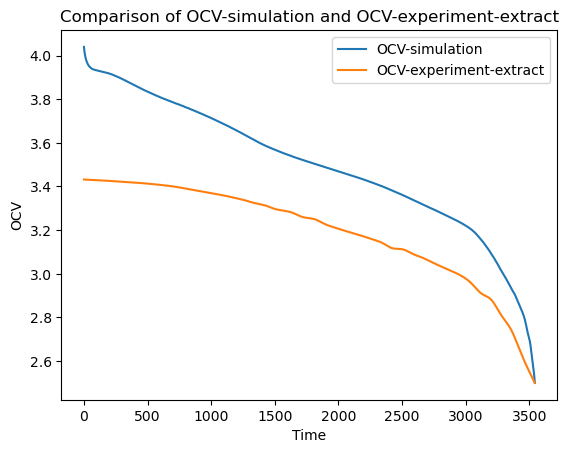

In [27]:
plt.plot(time1, ocv1, label='OCV-simulation')
plt.plot(time2, ocv2, label='OCV-experiment-extract')

plt.legend()
plt.xlabel('Time')
plt.ylabel('OCV')
plt.title('Comparison of OCV-simulation and OCV-experiment-extract')

Text(0.5, 1.0, 'Comparison of OCV 3 and OCV 4')

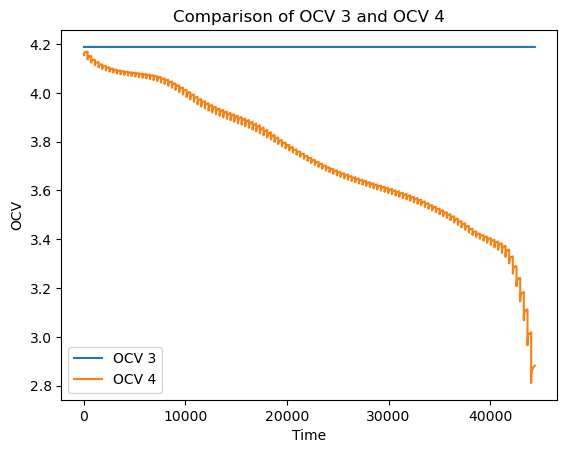

In [72]:
plt.plot(time3, ocv3, label='OCV 3')
plt.plot(time4, ocv4, label='OCV 4')

plt.legend()
plt.xlabel('Time')
plt.ylabel('OCV')
plt.title('Comparison of OCV 3 and OCV 4')

In [29]:
model = pybamm.lithium_ion.DFN()

# import drive cycle from file
drive_cycle = pd.read_csv("current_data.csv").to_numpy()

# load parameter values
param = pybamm.ParameterValues("OKane2022")

# create interpolant - must be a function of *dimensional* time
current_interpolant = pybamm.Interpolant(drive_cycle[:, 0], drive_cycle[:, 1], pybamm.t)

# set drive cycle
param["Current function [A]"] = current_interpolant

# set up simulation - for drive cycles we recommend using the CasadiSolver in "fast" mode
solver = pybamm.CasadiSolver(mode="fast")
simulation = pybamm.Simulation(model, parameter_values=param, solver=solver)

In [32]:
print(param['Current function [A]'])

ing_functio(time)


In [33]:
simulation.solve()
# 提取仿真结果
solution = simulation.solution

voltage = solution["Terminal voltage [V]"].entries
time = solution["Time [s]"].entries
current = solution["Current [A]"].entries

# 将结果保存到DataFrame中
df = pd.DataFrame({"Time [s]": time, "OCV [V]": voltage})

,Time [s],OCV [V]
0,0.000000,4.143768
1,36.363636,4.121217
2,72.727273,4.111684
3,109.090909,4.105037
4,145.454545,4.099584
...,...,...
95,3454.545455,3.982240
96,3490.909091,3.980400
97,3527.272727,3.978569
98,3563.636364,3.976785


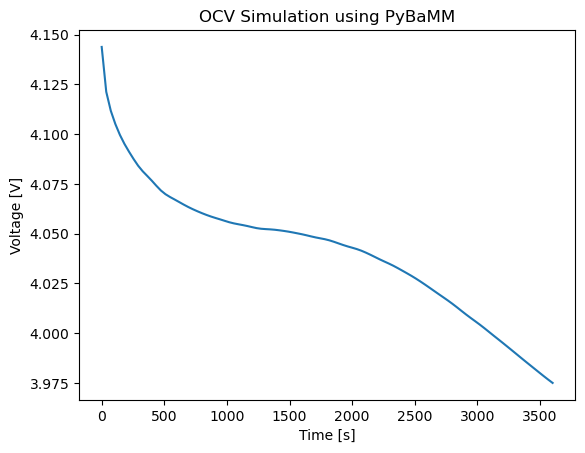

In [34]:
plt.plot(time, voltage)
plt.xlabel("Time [s]")
plt.ylabel("Voltage [V]")
plt.title("OCV Simulation using PyBaMM")
plt.show()